[2024-12-20 Fiddler](https://thefiddler.substack.com/p/happy-almost-new-year-from-the-fiddler-f0b)
====================

Fiddler
-------
Just do it with code.

In [1]:
from functools import cache

@cache
def get_largest_set(target, summands):
    result = frozenset()
    for n in sorted(summands, reverse=true):
        nset = frozenset([n])
        summands -= nset
        if n == target and len(result) == 0:
            result = nset
        elif n < target:
            s = get_largest_set(target-n, summands)
            if len(s) > 0 and len(s) >= len(result):
                result = s | nset
    return result

In [2]:
# this is kind of slow
# s = get_largest_set(2025, frozenset(prime_range(2025)))
# print(f"{sum(s)} is the sum of {len(s)} primes: {sorted(s)}")

    2025 is the sum of 32 primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 139, 293]

The smallest prime not in this list is 127, so the only ways to expand this list are to
divide 139 or 293 into 3 primes, or divide 432 = 139+293 into 4 primes, and since 1/3
of 139 and 293 are less than 127 and 1/4 of 432 is less than 127, so 32 is the greatest
number of distinct primes summing to 2025.

Extra credit
------------
Finding all sets of 5 primes that sum to 2025 is computationally infeasible.  And there
are so many that dealing with them would be infeasible.

But if I find one set, finding others that share two of them might be feasible.

In [3]:
def d20(faces):
    g = graphs.DodecahedralGraph()
    f1 = faces[0]
    f2 = faces[1]
    f3 = faces[2]
    relabel = {}
    for i in [0..19]:
        relabel[i] = f"#{i}#"
    relabel[10] = f"{list(f1&f2&f3)}"
    relabel[9] = f"{list(f1&f2-f3)}"
    relabel[11] = f"{list(f1&f3-f2)}"
    relabel[0] = f"{list(f2&f3-f1)}"
    relabel[12] = f"#12#{list(f1-f2-f3)}"
    relabel[13] = f"#13#{list(f1-f2-f3)}"
    relabel[1] = f"#1#{list(f2-f1-f3)}"
    relabel[8] = f"#8#{list(f2-f1-f3)}"
    relabel[18] = f"#18#{list(f3-f1-f2)}"
    relabel[19] = f"#19#{list(f3-f1-f2)}"
    if len(faces) > 3:
        f4 = faces[3]
        relabel[1] = f"{list(f2-f1-f3-f4)}"
        relabel[8] = f"{list(f2&f4 - f1)}"
        relabel[13] = f"{list(f1&f4 - f2)}"
        relabel[12] = f"{list(f1-f2-f3-f4)}"
        relabel[7] = f"#7#{list(f4-f1-f2)}"
        relabel[14] = f"#14{list(f4-f1-f2)}"
    if len(faces) > 4:
        f5 = faces[4]
        relabel[7] = f"{list(f4-f1-f2-f5)}"
        relabel[14] = f"{list(f4&f5-f1)}"
        relabel[15] = f"#15#{list(f4-f1-f2)}"
        relabel[16] = f"#16#{list(f4-f1-f2)}"
    if len(faces) > 5:
        f6 = faces[5]
        relabel[18] = f"{list(f3&f6-f1)}"
        relabel[19] = f"{list(f3-f1-f2-f6)}"
        relabel[16] = f"{list(f5&f6-f1)}"
        relabel[15] = f"{list(f5-f4-f1-f6)}"
        relabel[17] = f"{list(f6-f1-f3-f5)}"
    if len(faces) > 6:
        f7 = faces[6]
        relabel[6] = f"#6#{list(f7-f2-f4)}"
        relabel[2] = f"#6#{list(f7-f2-f4)}"
    if len(faces) > 7:
        f8 = faces[7]
        relabel[6] = f"{list(f7&f8-f4)}"
        relabel[2] = f"{list(f7-f2-f4-f8)}"
        relabel[5] = f"{list(f8-f7-f4-f5)}"
    if len(faces) > 8:
        f9 = faces[8]
        relabel[4] = f"{list(f9-f8-f5-f6)}"
    if len(faces) > 9:
        f10 = faces[9]
        relabel[3] = f"{list(f10-f3-f6-f9)}"
    g.relabel(relabel)
    return g.plot(vertex_size=500)

And the search doesn't seem feasible.  Finding 8 faces summing to 2025 is a quick
calculation, but finding the last 2 primes is difficult.  Here's a case with 9
faces summing to 2025 and 3 faces that do not.

[2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 1994, 1478, 1700, 2025]


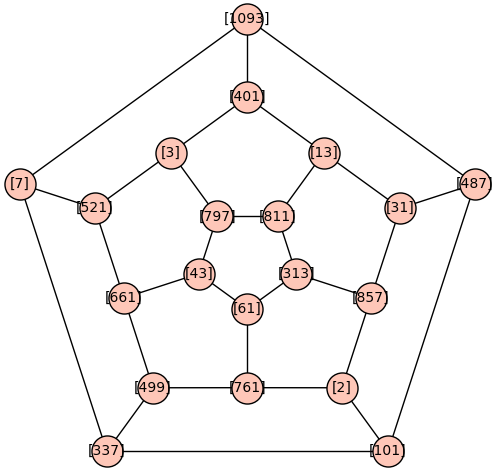

In [4]:
faces = (frozenset({3, 13, 401, 797, 811}),
 frozenset({3, 7, 401, 521, 1093}),
 frozenset({13, 31, 401, 487, 1093}),
 frozenset({3, 43, 521, 661, 797}),
 frozenset({43, 61, 313, 797, 811}),
 frozenset({13, 31, 313, 811, 857}),
 frozenset({7, 337, 499, 521, 661}),
 frozenset({43, 61, 499, 661, 761}),
 frozenset({2, 61, 313, 761, 857}),
 frozenset({2, 31, 101, 487, 857}),
 frozenset({2, 101, 337, 499, 761}),
 frozenset({7, 101, 337, 487, 1093}))
print([sum(f) for f in faces])
d20(faces)

In [5]:
def find_2(n, summands):
    for i in summands:
        if 2*i < n and n-i in summands:
            yield frozenset([i,n-i])

def face1s():
    for p1 in prime_range(400,2000):
        for s1 in [810..2025-p1]:
            s2 = 2025 - p1 - s1
            for p23 in find_2(s1, frozenset(prime_range(s1)) - frozenset([p1])):
                for p45 in find_2(s2, frozenset(prime_range(s2)) - frozenset([p1]) - p23):
                    yield frozenset([p1]) | p23 | p45

In [6]:
def test(g,drop=0,disp=5):
    iter = g.__iter__()
    for i in range(drop):
        item = next(iter,None)
        if item == None:
            return None
    for i in range(disp):
        item = next(iter,None)
        if item == None:
            return None
        print(item)
    return item

f1 = test(face1s())

frozenset({401, 3, 797, 811, 13})
frozenset({401, 5, 809, 797, 13})
frozenset({401, 773, 41, 797, 13})
frozenset({401, 53, 761, 797, 13})
frozenset({401, 71, 743, 797, 13})


Given a set of 5 primes, find adjoining sets.

In [7]:
def find_3(target, summands):
    for i in summands:
        for s in find_2(target-i,summands - frozenset([i])):
            yield s | frozenset([i])

def face2s(face1):
    join = frozenset(list(face1)[:2])
    n = 2025 - sum(join)
    for p in find_3(n, frozenset(prime_range(n)) - face1):
        yield join | p

In [8]:
f2 = test(face2s(f1))
(f1,f2)

frozenset({401, 3, 1543, 7, 71})
frozenset({401, 3, 19, 71, 1531})
frozenset({401, 1009, 3, 71, 541})
frozenset({401, 1489, 3, 71, 61})
frozenset({401, 3, 67, 71, 1483})


(frozenset({13, 71, 401, 743, 797}), frozenset({3, 67, 71, 401, 1483}))

In [9]:
def face3s(face1, face2):
    edge = face1 & face2
    for p1 in face1&face2:
        for p2 in face1-face2:
            for p3 in face2-face1:
                n = 2025 - p1 - p2 - p3
                for p in find_2(n, frozenset(prime_range(n)) - face1 - face2):
                    yield frozenset([p1,p2,p3]) | p

In [10]:
f3 = test(face3s(f1,f2))
(f1,f2,f3)

frozenset({401, 1021, 67, 523, 13})
frozenset({401, 67, 547, 997, 13})
frozenset({401, 577, 67, 967, 13})
frozenset({401, 67, 73, 13, 1471})
frozenset({401, 67, 937, 13, 607})


(frozenset({13, 71, 401, 743, 797}),
 frozenset({3, 67, 71, 401, 1483}),
 frozenset({13, 67, 401, 607, 937}))

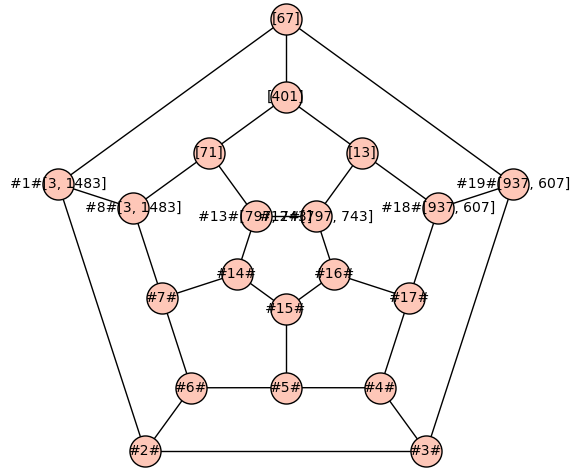

In [11]:
d20((f1,f2,f3))

In [12]:
def face4s(face1,face2,face3):
    for p1 in face1&face2-face3:
        for p2 in face1-face2-face3:
            for p3 in face2-face1-face3:
                n = 2025 - p1 - p2 - p3
                for p in find_2(n, frozenset(prime_range(n)) - face1 - face2 - face3):
                    yield frozenset([p1,p2,p3]) | p

In [13]:
f4 = test(face4s(f1,f2,f3))
(f1,f2,f3,f4)

frozenset({3, 631, 71, 523, 797})
frozenset({541, 3, 613, 71, 797})
frozenset({3, 1123, 71, 797, 31})
frozenset({3, 1117, 37, 71, 797})
frozenset({3, 61, 1093, 71, 797})


(frozenset({13, 71, 401, 743, 797}),
 frozenset({3, 67, 71, 401, 1483}),
 frozenset({13, 67, 401, 607, 937}),
 frozenset({3, 61, 71, 797, 1093}))

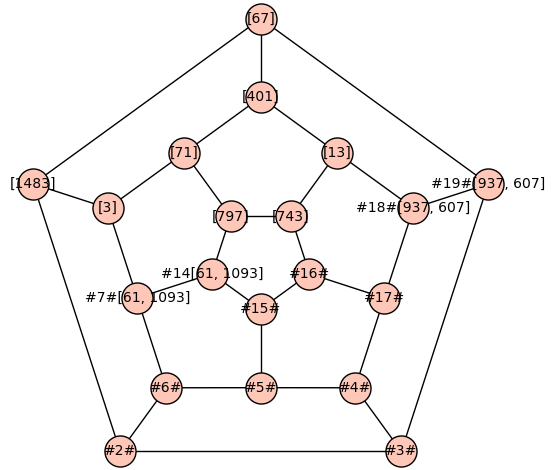

In [14]:
d20((f1,f2,f3,f4))

In [15]:
def face5s(face1,face2,face3,face4):
    for p1 in face1&face4 - face2:
        for p2 in face1-face2-face3-face4:
            for p3 in face4-face1-face2:
                n = 2025 - p1 - p2 - p3
                for p in find_2(n, frozenset(prime_range(n)) - face1 - face2 - face3 - face4):
                    yield frozenset([p1,p2,p3]) | p

In [16]:
f5 = test(face5s(f1,f2,f3,f4))

frozenset({419, 5, 743, 797, 61})
frozenset({743, 41, 797, 61, 383})
frozenset({743, 317, 797, 107, 61})
frozenset({113, 311, 743, 797, 61})
frozenset({131, 293, 743, 797, 61})


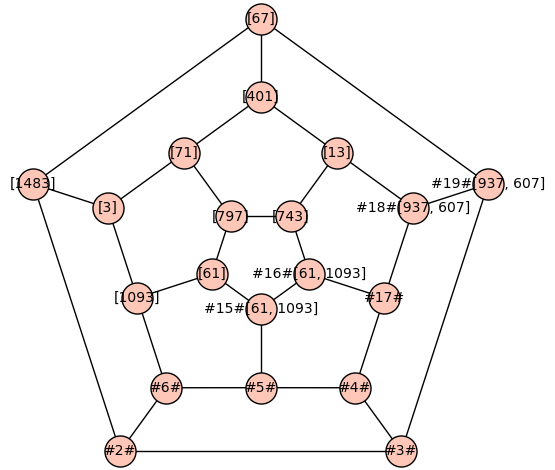

In [17]:
d20((f1,f2,f3,f4,f5))

In [18]:
def face6s(face1,face2,face3,face4,face5):
    for p1 in face1&face3-face2:
        for p2 in face1&face5-face4:
            for p3 in face3-face1-face2:
                for p4 in face5-face1-face4:
                    n = 2025 - p1 - p2 - p3 - p4
                    if is_prime(n) and n not in face1|face2|face3|face4|face5:
                        yield frozenset([p1,p2,p3,p4,n])

In [19]:
def test_f6():
    for f1 in face1s():
        for f2 in face2s(f1):
            for f3 in face3s(f1,f2):
                for f4 in face4s(f1,f2,f3):
                    for f5 in face5s(f1,f2,f3,f4):
                        for f6 in face6s(f1,f2,f3,f4,f5):
                            yield (f1,f2,f3,f4,f5,f6)

(f1,f2,f3,f4,f5,f6) = test(test_f6())
(f1,f2,f3,f4,f5,f6)

(frozenset({401, 3, 797, 811, 13}), frozenset({401, 3, 5, 7, 1609}), frozenset({401, 509, 5, 1097, 13}), frozenset({3, 7, 11, 1193, 811}), frozenset({811, 17, 389, 11, 797}), frozenset({101, 1097, 13, 17, 797}))
(frozenset({401, 3, 797, 811, 13}), frozenset({401, 3, 5, 7, 1609}), frozenset({401, 509, 5, 1097, 13}), frozenset({3, 7, 11, 1193, 811}), frozenset({811, 17, 389, 11, 797}), frozenset({389, 797, 13, 317, 509}))
(frozenset({401, 3, 797, 811, 13}), frozenset({401, 3, 5, 7, 1609}), frozenset({401, 509, 5, 1097, 13}), frozenset({3, 7, 11, 1193, 811}), frozenset({811, 23, 11, 797, 383}), frozenset({797, 683, 13, 23, 509}))
(frozenset({401, 3, 797, 811, 13}), frozenset({401, 3, 5, 7, 1609}), frozenset({401, 509, 5, 1097, 13}), frozenset({3, 7, 11, 1193, 811}), frozenset({811, 359, 11, 797, 47}), frozenset({71, 1097, 13, 47, 797}))
(frozenset({401, 3, 797, 811, 13}), frozenset({401, 3, 5, 7, 1609}), frozenset({401, 509, 5, 1097, 13}), frozenset({3, 7, 11, 1193, 811}), frozenset({811,

(frozenset({3, 13, 401, 797, 811}),
 frozenset({3, 5, 7, 401, 1609}),
 frozenset({5, 13, 401, 509, 1097}),
 frozenset({3, 7, 11, 811, 1193}),
 frozenset({11, 47, 359, 797, 811}),
 frozenset({13, 347, 359, 509, 797}))

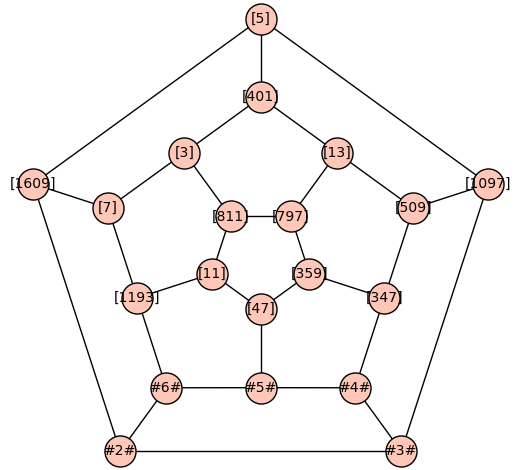

In [20]:
d20((f1,f2,f3,f4,f5,f6))

In [21]:
def face78s(face1,face2,face3,face4,face5,face6):
    for p1 in face2-face1-face3-face4:
        for p2 in face4&face2-face1-face5:
            for p3 in face4-face2-face1-face5:
                n = 2025 - p1 - p2 - p3
                for p in find_2(n, frozenset(prime_range(n)) - face1 - face2 - face3 - face4 - face5 - face6):
                    for p4 in p:
                        p5 = n - p4
                        p6 = 2025 - p3 - p4 - sum(face5-face1-face6)
                        if is_prime(p6) and p6 not in face1|face2|face3|face4|face5|face6|p:
                            yield (frozenset([p1, p2, p3]) | p, frozenset([p3,p4,p6]) | (face5-face1-face6))

In [22]:
def test_f78():
    for f1 in face1s():
        for f2 in face2s(f1):
            for f3 in face3s(f1,f2):
                for f4 in face4s(f1,f2,f3):
                    for f5 in face5s(f1,f2,f3,f4):
                        for f6 in face6s(f1,f2,f3,f4,f5):
                            for (f7,f8) in face78s(f1,f2,f3,f4,f5,f6):
                                yield (f1,f2,f3,f4,f5,f6,f7,f8)

(f1,f2,f3,f4,f5,f6,f7,f8) = test(test_f78())

(frozenset({401, 3, 797, 811, 13}), frozenset({401, 3, 5, 7, 1609}), frozenset({401, 5, 761, 811, 47}), frozenset({1129, 3, 7, 89, 797}), frozenset({67, 19, 1129, 797, 13}), frozenset({67, 811, 13, 373, 761}), frozenset({1609, 181, 7, 89, 139}), frozenset({1129, 19, 181, 89, 607}))
(frozenset({401, 3, 797, 811, 13}), frozenset({401, 3, 5, 7, 1609}), frozenset({401, 5, 761, 811, 47}), frozenset({1129, 3, 7, 89, 797}), frozenset({67, 19, 1129, 797, 13}), frozenset({67, 811, 13, 373, 761}), frozenset({1609, 163, 7, 89, 157}), frozenset({1129, 19, 631, 89, 157}))
(frozenset({401, 3, 797, 811, 13}), frozenset({401, 3, 5, 7, 1609}), frozenset({401, 5, 761, 811, 47}), frozenset({1129, 3, 7, 89, 797}), frozenset({67, 19, 1129, 797, 13}), frozenset({67, 811, 13, 373, 761}), frozenset({1609, 37, 7, 89, 283}), frozenset({1129, 19, 37, 89, 751}))
(frozenset({401, 3, 797, 811, 13}), frozenset({401, 3, 5, 7, 1609}), frozenset({401, 5, 761, 811, 47}), frozenset({1129, 3, 7, 89, 797}), frozenset({67, 

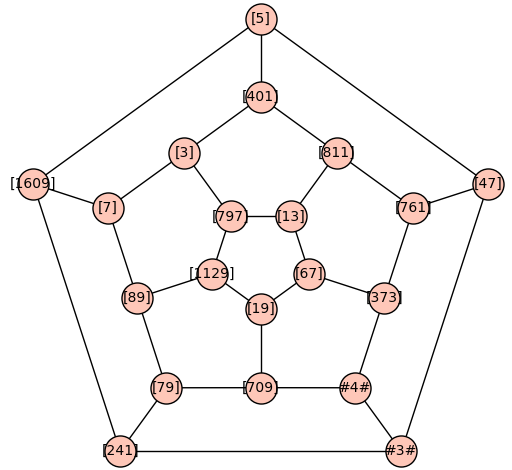

In [23]:
d20((f1,f2,f3,f4,f5,f6,f7,f8))

In [24]:
def face9101112s(face1,face2,face3,face4,face5,face6,face7,face8):
    p1 = 2025 - sum((face8|face5|face6)-face7-face4-face1-face2)
    p2 = 2025 - sum((face2|face3|face7)-face8-face4-face1-face6)
    if p1 == p2:
        return
    if not (is_prime(p1) and is_prime(p2)):
        return
    if p1 in face1|face2|face3|face4|face5|face6|face7|face8:
        return
    if p2 in face1|face2|face3|face4|face5|face6|face7|face8:
        return
    face9 = frozenset([p1]) | ((face8|face5|face6)-face7-face4-face1-face3)
    face12 = frozenset([p2]) | ((face2|face3|face7)-face8-face4-face1-face6)
    if sum(face12) != 2025:
        pass #return
    face10 = (face3|face6|face9|face12) - face1-face2-face4-face5-face7-face8
    face11 = (face7|face8|face9|face10|face12) - face1-face2-face3-face4-face5-face6
    yield(face9,face10,face11,face12)

In [25]:
def test_f9101112():
    for f1 in face1s():
        for f2 in face2s(f1):
            for f3 in face3s(f1,f2):
                for f4 in face4s(f1,f2,f3):
                    for f5 in face5s(f1,f2,f3,f4):
                        for f6 in face6s(f1,f2,f3,f4,f5):
                            for (f7,f8) in face78s(f1,f2,f3,f4,f5,f6):
                                for (f9,f10,f11,f12) in face9101112s(f1,f2,f3,f4,f5,f6,f7,f8):
                                    yield (f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12)

it = test_f9101112().__iter__()